In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [19]:
#Importing the dataset
white_wine_data=pd.read_csv('wine+quality/winequality-white.csv',sep=';')
red_wine_data=pd.read_csv('wine+quality/winequality-red.csv',sep=';')

print(white_wine_data.shape)
print(red_wine_data.shape)

(4898, 12)
(1599, 12)


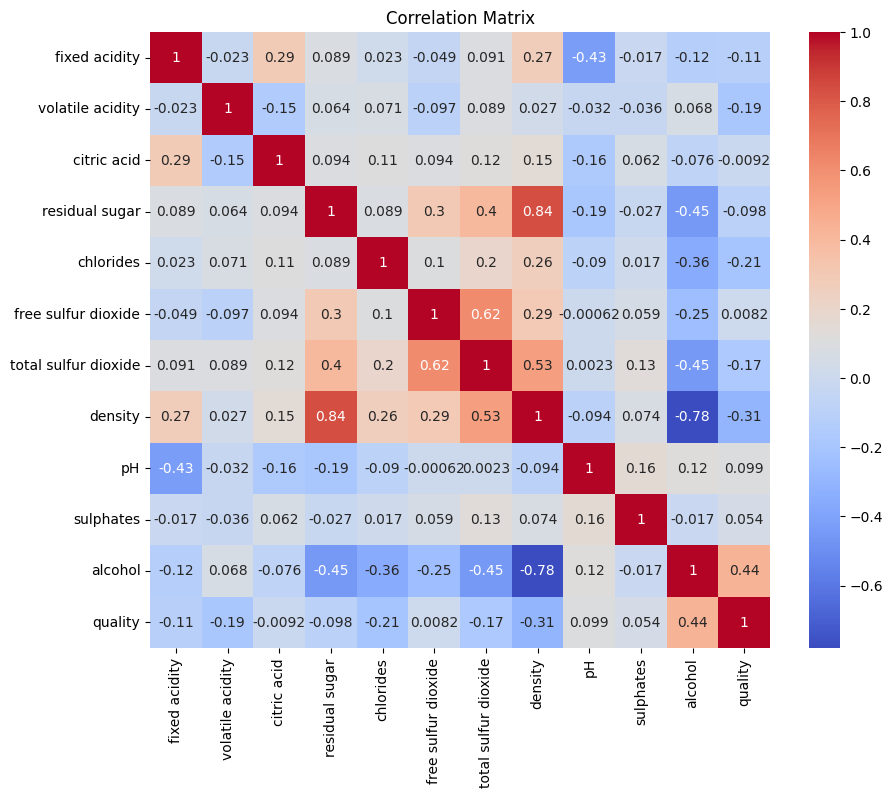

In [25]:
#calculation of the correlation matrix
correlation_matrix = white_wine_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show() # plotting the correlation matrix

